In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import random

In [2]:
base_dir='/home/michal/fire_and_nofire_filtered'

train_dir=os.path.join(base_dir,'Train_Data')

train_dir_Non_Fire=os.path.join(train_dir,'Non_Fire')
train_dir_Fire=os.path.join(train_dir,'Fire')




valid_dir=os.path.join(base_dir,'Valid_Data')

valid_dir_Non_Fire=os.path.join(valid_dir,'Non_Fire')
valid_dir_Fire=os.path.join(valid_dir,'Fire')





test_dir=os.path.join(base_dir,'Test_Data')

test_dir_Non_Fire=os.path.join(test_dir,'Non_Fire')
test_dir_Fire=os.path.join(test_dir,'Fire')


In [3]:
no_train_Non_Fire=len(os.listdir(train_dir_Non_Fire))
no_train_Fire=len(os.listdir(train_dir_Fire))

no_test_Non_Fire=len(os.listdir(test_dir_Non_Fire))
no_test_Fire=len(os.listdir(test_dir_Fire))

no_valid_Non_Fire=len(os.listdir(valid_dir_Non_Fire))
no_valid_Fire=len(os.listdir(valid_dir_Fire))


total_train=no_train_Non_Fire+no_train_Fire
print('Total number of training samples: {}'.format(total_train))

total_valid=no_valid_Non_Fire+no_valid_Fire
print('Total number of validation samples: {}'.format(total_valid))

total_test=no_test_Non_Fire+no_test_Fire
print('Total number of test samples: {}'.format(total_test))

Total number of training samples: 4611
Total number of validation samples: 2333
Total number of test samples: 50


https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

In [4]:
BATCH_SIZE=32
params_to_generate = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255,
                                                                     rotation_range=45,
                                                                     zoom_range=0.5,
                                                                     height_shift_range=0.1,
                                                                     width_shift_range=0.1,
                                                                     horizontal_flip=True,
                                                                     fill_mode='nearest')

data_train_set = params_to_generate.flow_from_directory(train_dir,
                                                        batch_size=BATCH_SIZE,
                                                        shuffle=True,
                                                        target_size=(150,150),
                                                        class_mode='binary')


data_valid_set = params_to_generate.flow_from_directory(valid_dir,
                                                        batch_size=BATCH_SIZE,
                                                        shuffle=True,
                                                        target_size=(150,150),
                                                        class_mode='binary')


data_test_set = params_to_generate.flow_from_directory(test_dir,
                                                        batch_size=BATCH_SIZE,
                                                        shuffle=True,
                                                        target_size=(150,150),
                                                        class_mode='binary')

#data_valid_set = data_valid_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)


Found 4611 images belonging to 2 classes.
Found 2333 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


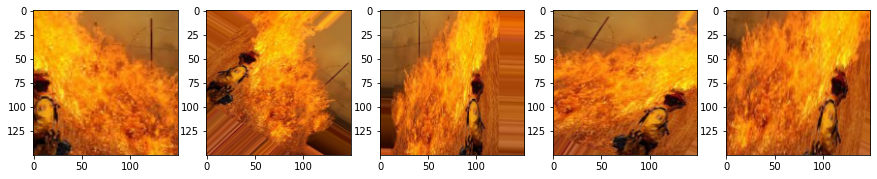

In [5]:
def plot_images(rows,cols,sample_img_array):
    fig,axes=plt.subplots(rows,
                          cols,
                          figsize=(15,15))
    for img,ax in zip(sample_img_array,axes):
        ax.imshow(img)
    plt.show()

augmented_images = [data_train_set[0][0][0] for i in range(5)]
plot_images(1,5,augmented_images)

32


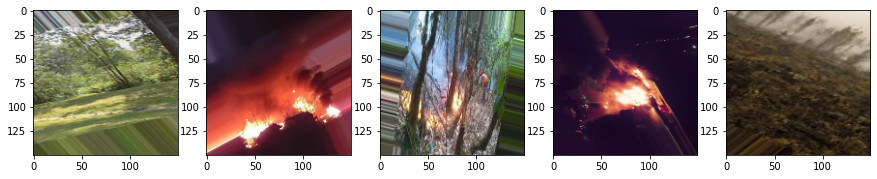

In [6]:
sample_img_array,_ = data_train_set.next()
print(len(sample_img_array))
plot_images(1,5,sample_img_array[0:5])

In [10]:
images, labels = next(data_train_set)

In [11]:
images.shape

(32, 150, 150, 3)

In [12]:
sample_img_array[0].shape

(150, 150, 3)

In [13]:
def get_model(input_shape):
    model=tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=(150,150,3)),
                               tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'),
                               tf.keras.layers.MaxPooling2D(pool_size=2),
                               tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'),
                               tf.keras.layers.MaxPooling2D(pool_size=2),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(units=128,activation='relu'),
                               tf.keras.layers.Dense(units=2,activation='softmax')])
    return model

In [14]:
model=get_model(sample_img_array[0].shape)

In [15]:
def compile_model(model):
    model.compile(optimizer='adam',metrics='accuracy',loss='SparseCategoricalCrossentropy')

In [16]:
compile_model(model)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 165888)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               21233792  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

In [18]:
EPOCHS=2
model_history=model.fit(data_train_set,
                        batch_size=BATCH_SIZE,
                        epochs=EPOCHS,
                        validation_data=data_valid_set)

Epoch 1/2
145/145 [==============================] - 292s 2s/step - loss: 0.4190 - accuracy: 0.8647 - val_loss: 0.2798 - val_accuracy: 0.8847
Epoch 2/2
145/145 [==============================] - 295s 2s/step - loss: 0.2454 - accuracy: 0.9093 - val_loss: 0.1914 - val_accuracy: 0.9061
